<a href="https://colab.research.google.com/github/atharv1422/EDS.ass/blob/main/ASSIGNMENT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv("/content/Book1 Weather forecast (1).csv")
df_binary = df[['Temperature (C)', 'Apparent Temperature (C)']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Temperature(C)', 'Apparent Temperature(C)']
#display the first 5 rows
df_binary.head(20)

,Temperature(C),Apparent Temperature(C)
0,9.472222,7.388889
1,9.355556,7.227778
2,9.377778,9.377778
3,8.288889,5.944444
4,8.755556,6.977778
5,9.222222,7.111111
6,7.733333,5.522222
7,8.772222,6.527778
8,10.822222,10.822222
9,13.772222,13.772222


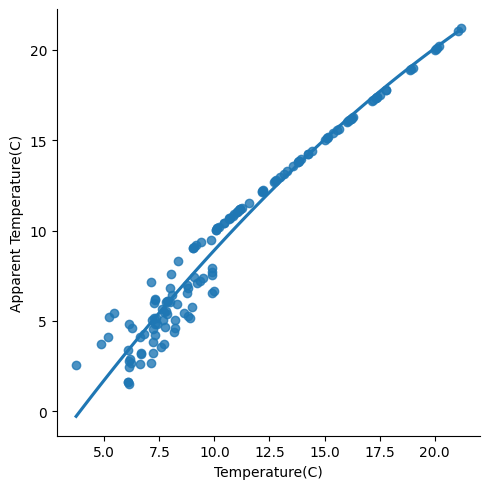

In [ ]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Temperature(C)", y ="Apparent Temperature(C)", data = df_binary, order = 2, ci = None)
plt.show()

In [ ]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)

<ipython-input-7-fe81e81b8df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)


In [ ]:
X = np.array(df_binary['Temperature(C)']).reshape(-1, 1)
y = np.array(df_binary['Apparent Temperature(C)']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9301469309887066


<ipython-input-8-ca589d0078e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


In [ ]:
ypr=regr.predict(X_test)
print(ypr)

[[ 6.06959729]
 [ 4.24137915]
 [15.00232486]
 [ 8.91274534]
 [21.0112477 ]
 [ 4.68499091]
 [ 4.10695135]
 [ 5.89484114]
 [ 6.56698016]
 [ 7.31977586]
 [ 5.43778661]
 [10.11587418]
 [16.15168258]
 [ 6.10320424]
 [ 6.17713953]
 [15.29134464]
 [ 7.28616891]
 [ 7.31305447]
 [ 8.13306408]
 [ 6.70140796]
 [ 9.01356619]
 [16.25250343]
 [ 4.01285189]
 [ 7.83060152]
 [ 7.44076089]
 [22.30175461]
 [ 9.30930736]
 [ 7.62223842]
 [ 4.06662301]
 [ 4.18760803]
 [ 6.02926894]
 [ 5.3033588 ]
 [ 5.97549782]
 [ 2.54758882]
 [ 6.39222402]
 [ 6.3317315 ]
 [ 4.06662301]
 [ 7.62223842]]


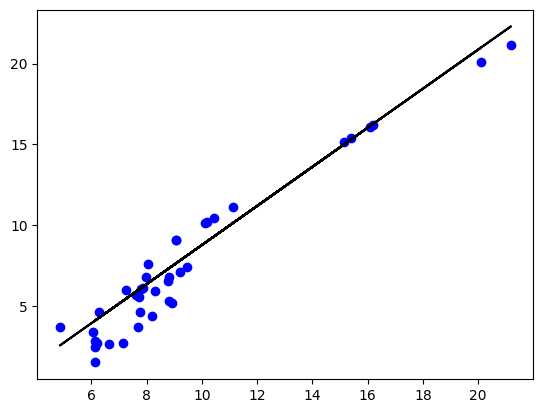

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values

KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Extract the required columns
X = df[['Temperature (C)']]
y = df['Apparent Temperature (C)']

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Implement KNN regression
knn = KNeighborsRegressor(n_neighbors=3)  # Adjust the number of neighbors (K) as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.7935985369315595


In [ ]:
print(y_pred)

[ 5.81666667 14.2037037   5.86666667  2.88333333  3.10185185  5.39259259
 15.9037037  13.84814815  7.7537037   5.89814815  6.43888889 17.56666667
 19.67962963 13.84814815 13.00555556 12.19074074 16.21851852  5.81666667
 11.12037037 12.82962963  3.02407407  4.78518519 11.15925926  2.40555556
  5.19259259 10.58333333  8.51851852  2.40555556 15.11296296  5.01851852
 10.07222222 18.90740741 13.63148148 17.29814815 20.12592593  4.93333333
 11.15925926  4.79259259  6.21296296  8.25        3.10185185  8.44444444
  8.25       15.26481481 16.11296296]
